# Neural networks with PyTorch

- Deep learning: Nhiều (có thể đến hàng trăm) layers
- Có thể build với weights matrices như Part 1, nhưng sẽ khó implement
- Pytorch có module *nn* giúp xây dựng neural networks hiệu quả

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper


Bài toán MNIST: Phân loại chữ số viết tay đen trắng, mỗi ảnh là 28 x 28 pixel

In [6]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),]
)

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

- `shuffle=True`: Shuffle lại data mỗi lần đi qua dataloader
- images sẽ có shape (64, 1, 28, 28): 64 ảnh trong 1 batchs, 1 kênh màu

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


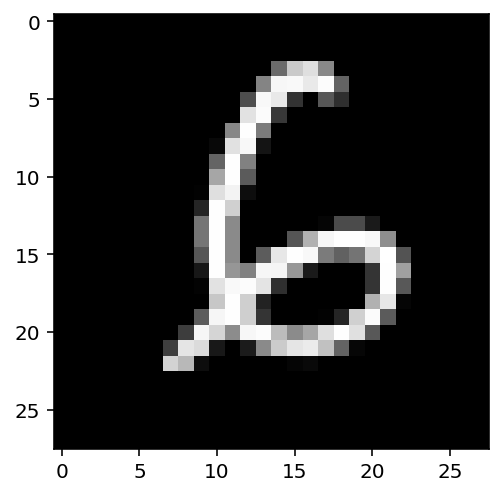

In [8]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [19]:
# Mạng fully connected theo matrix cũ:
n_features = 28 * 28
n_classes = 10

weights = torch.randn((n_features, n_classes))
bias = torch.randn((10))
out = images.view(images.shape[0], -1).mm(weights) + bias
out.shape

torch.Size([64, 10])

In [23]:
torch.arange(12).view(4, 3).max(dim=1, keepdim=True)

torch.return_types.max(
values=tensor([[ 2],
        [ 5],
        [ 8],
        [11]]),
indices=tensor([[2],
        [2],
        [2],
        [2]]))

In [33]:
def softmax(x):
    exp = torch.exp(x) 
    sum_row = torch.sum(exp, dim=1, keepdim=True)
    return exp / sum_row
    

In [37]:
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Xây dựng 1 mạng Neural Network
Sử dụng module *nn* của Pytorch

In [38]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__() # Bắt buộc có
        self.hidden = nn.Linear(784, 256) # x.W + b, trong net.hidden
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [39]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

Có thể dùng `import torch.nn.functional as F`để define gọn gàng hơn

In [40]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

> Create a network with **784 input units**, a hidden layer with 128 units and a **ReLU** activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation as shown above. You can use a ReLU activation with the nn.ReLU module or F.relu function.

In [41]:
import torch.nn.functional as F

class MySolutionNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu_(self.fc1(x))
        x = F.relu_(self.fc2(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [44]:
model = MySolutionNet()
print(model.fc1.weight.shape)
print(model.fc1.bias.shape)

torch.Size([128, 784])
torch.Size([128])


In [45]:
model.fc1.bias.data.fill_(0) # fill bias thành 0s
model.fc1.weight.data.normal_(std=0.01)

tensor([[-0.0023,  0.0116,  0.0069,  ...,  0.0007, -0.0034, -0.0013],
        [ 0.0031,  0.0048, -0.0083,  ...,  0.0096,  0.0008, -0.0073],
        [ 0.0198,  0.0067, -0.0095,  ..., -0.0080,  0.0098,  0.0054],
        ...,
        [ 0.0059, -0.0015, -0.0059,  ..., -0.0150,  0.0092,  0.0142],
        [ 0.0055, -0.0065,  0.0031,  ...,  0.0102, -0.0006, -0.0119],
        [ 0.0008,  0.0025, -0.0075,  ..., -0.0086, -0.0025, -0.0029]])

### Forward Pass

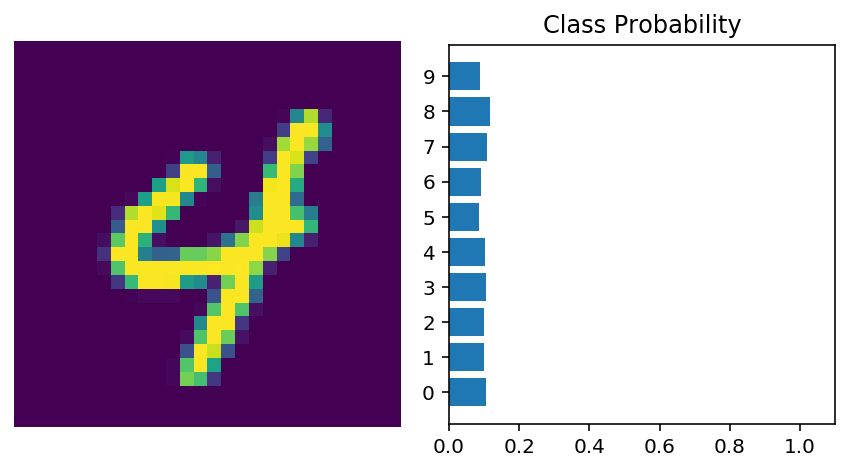

In [49]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(images.shape[0], 1, 784) # b, num_color, w * h
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
probabilities = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), probabilities)

### Sử dụng nn.Sequential

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


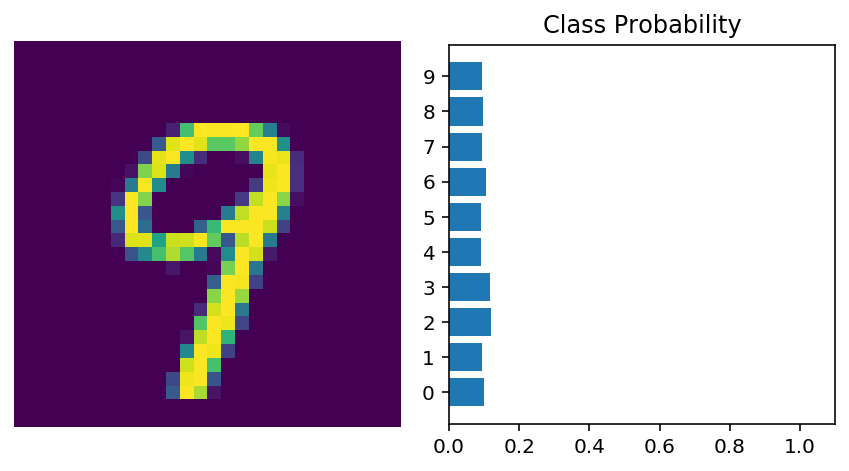

In [51]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [52]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0284, -0.0008,  0.0178,  ..., -0.0293,  0.0330, -0.0259],
        [ 0.0226,  0.0308,  0.0238,  ..., -0.0048, -0.0084, -0.0033],
        [-0.0243,  0.0077, -0.0325,  ...,  0.0049,  0.0230, -0.0321],
        ...,
        [ 0.0291,  0.0355,  0.0152,  ..., -0.0185,  0.0328, -0.0086],
        [ 0.0005,  0.0107,  0.0229,  ..., -0.0243, -0.0122, -0.0338],
        [-0.0343, -0.0119, -0.0186,  ..., -0.0076, -0.0057, -0.0148]],
       requires_grad=True)

1 cách access khác là sử dụng OrderDict để access weights như cách nn cũ

In [53]:
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [54]:
model.fc1

Linear(in_features=784, out_features=128, bias=True)

In [55]:
model[0]

Linear(in_features=784, out_features=128, bias=True)